### 다차원 배열


1차원 배열

In [1]:
import numpy as np 
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [2]:
np.ndim(A) #차원 표시

1

In [3]:
A.shape

(4,)

In [4]:
A.shape[0]

4

2차원 배열 


In [5]:
B = np.array ([[1,2],[3,4],[5,6]])
print(B)


[[1 2]
 [3 4]
 [5 6]]


In [6]:
np.ndim(B) #차원 표시

2

In [7]:
B.shape

(3, 2)

In [8]:
B.shape[0]

3

행렬의 곱

In [9]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

In [10]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

행렬의 곱이 가능하려면 A의 1번째 차원의 원소 수 와 행렬 B 의 0번째 차원의 수가 같아야 합니다. 

행렬의 곱으로 나타내주는 np.dot 기능은 신경망을 구현할때 매우 중요하다. 

### 3층 신경망 구현하기

In [11]:
def sigmoid(x):
    return 1/ (1 +np.exp(-x))

In [12]:
X= np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [13]:
A1 =np.dot(X,W1)+B1

In [14]:
z1 =sigmoid(A1)

In [15]:
print(A1)

[0.3 0.7 1.1]


In [16]:
print(z1)

[0.57444252 0.66818777 0.75026011]


### 1층에서 2층으로 가는 과정

In [17]:
W2 =np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 =np.array([0.1,0.2])

print(z1.shape) #shape는 넘파이 array 만 가능하다. 
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [18]:
A2 = np.dot(z1,W2) +B2
z2 = sigmoid(A2)

In [19]:
print(A2)

[0.51615984 1.21402696]


In [20]:
print(z2)

[0.62624937 0.7710107 ]


2층에서 출력층으로의 신호전달

In [21]:
def identity_function(x): #입력을 그대로 출력하는 함수 항등함수라고 한다.ㅣ 여기서는 활성화 함수로 사용
    return x

W3 = np.array([[0.1,0.3],[0.12,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(z2,W3) +B3
Y = identity_function(A3)
Y

array([0.25514622, 0.69627909])

In [22]:
A3

array([0.25514622, 0.69627909])

### 구현 총정리

In [23]:
'''
입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의
뉴런으로 구성.
1, 2층의 활성화 함수 : 시그모이드
3층의 활성화 함수 : 항등함수
출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.
예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수,
다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.
'''


def init_network():
    network ={}
    network['w1'] =np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] =np.array([0.1,0.2,0.3])
    network['w2'] =np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] =np.array([0.1,0.2])
    network['w3'] =np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] =np.array([0.1,0.2])
    
    return network

def forward(network, x):
    w1,w2,w3 = network['w1'], network['w2'],network['w3']
    b1,b2,b3 = network['b1'], network['b2'],network['b3']
    
    a1 = np.dot(x,w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x= np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


In [24]:
print(network)

{'w1': array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]]), 'b1': array([0.1, 0.2, 0.3]), 'w2': array([[0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6]]), 'b2': array([0.1, 0.2]), 'w3': array([[0.1, 0.3],
       [0.2, 0.4]]), 'b3': array([0.1, 0.2])}


init_network() 함수는 가중치와 편향을 초기화 하고 이들을 딕셔너리 변수인 network 에 저장합니다. <br>
forward()함수는 입력신호를 출력으로 변환하는 처리 과정을 모두 구현하고 있습니다. foward라 한것은 신호가 순방향으로 전달됨을 알리기 위함입니다.(순전파)

출력층 설계는 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라집니다. 일반적으로 회귀에는 항등함수를, 분류에는 소프트맥스 함수를 사용합니다. 

### 항등함수와 소프트 맥스 함수 구현하기

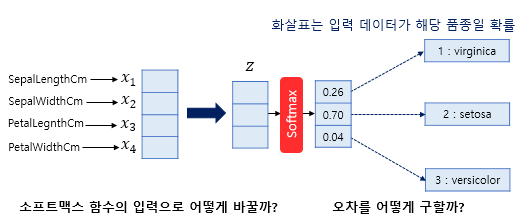

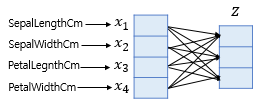

In [25]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a) # 지수함수
print(exp_a)


[ 1.34985881 18.17414537 54.59815003]


In [26]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [28]:
y = exp_a /sum_exp_a
print(y)
#각 값의 백분률

[0.01821127 0.24519181 0.73659691]


In [29]:
def softmax():
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    
    return y

오버플로 문제가 발생할 수 있다. 지수함수를 사용하기 때문인데 큰값끼리 나눗셈을 하면 결과 수치가 불안정해지기 때문입니다.
이를 막기위해  C라는 임의의 정수를 양쪽에 곱한다.

[1010,1000,990] 에서 최댓값인 1010을 모두 빼준다. [0,-10,-20] 이 되는데 그 값을 가지고 softmax를 구현한다.

In [30]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)# 오버플로 대책\
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [31]:
a= np.array([0.3, 2.9,4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


보는 바와 같이 소프트 맥스 함수의 출력은 0에서 1.0 사이의 실수입니다. 또, 소프트 맥스 함수 출력의 총합은 1입니다. 출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질입니다. 
또한 지수함수 y = exp(x) 가 단조 증가함수이기 때문에 대소관계는 달라지지 않습니다. 

### 출력층의 뉴런수 정하기

출력층의 뉴런 수는 풀련느 문제에 맞게 적절히 정해야 합니다.분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적입니다. 

### 3.6 손글씨 숫자 인식 mnist 데이터 셋

In [34]:
import sys
import os
import pickle
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


# 3.6.1 MNIST 데이터셋
'''
0~9 숫자 이미지로 구성.
훈련 이미지 60000장, 시험 이미지 10000장
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
레이블은 정답에 해당하는 숫자
'''
# 처음 한 번은 몇 분 정도 걸림
# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)


# 3.6.2 신경망의 추론 처리
'''
입력층 784개, 출력층 10개,
은닉층 50개, 100개로 구성(임의)
'''


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0

'''
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352
'''

# 3.6.3 배치 처리
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

ModuleNotFoundError: No module named 'dataset'